In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv.csv', skipfooter = 2, engine='python')


In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN


In [4]:
gdp_df[0:11]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [5]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns = "Value Footnotes", axis=1)


In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [9]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]

In [10]:
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561


Use .describe() to find the summary statistics for GDP per capita in 2014.

In [11]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

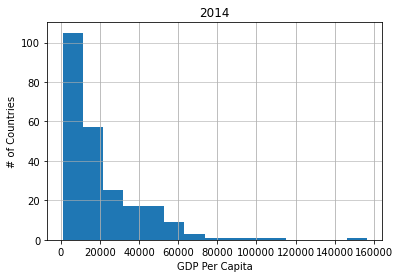

In [12]:
gdp_2014['GDP_Per_Capita'].plot.hist(grid=True, bins=15, rwidth=1.0)
plt.title('2014')
plt.xlabel('GDP Per Capita')
plt.ylabel('# of Countries')
plt.grid(axis='y', alpha=0.75)

Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [13]:
gdp_2014.sort_values(by=['GDP_Per_Capita'], ascending=False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [14]:
gdp_pivoted = (
    gdp_df
    [gdp_df['Year'].isin([1990,2017])]
    .pivot_table(
        values = 'GDP_Per_Capita',
        index = 'Country',
        columns = 'Year'
    )
    .dropna()
)

In [15]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [16]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]

How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [17]:
gdp_pivoted['Percent_Change']

Country
Albania                164.556297
Algeria                 34.197756
Angola                  26.411194
Antigua and Barbuda     28.335391
Arab World              50.138980
                          ...    
Vanuatu                  7.905517
Vietnam                327.655604
World                   67.902197
Zambia                  59.119377
Zimbabwe                -8.907075
Name: Percent_Change, Length: 207, dtype: float64

In [18]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0]

Year,1990,2017,Percent_Change
Country,,,
Brunei,71230.862143,60995.681114,-14.369026
Burundi,1184.842440,773.571858,-34.710993
Central African Republic,1201.677234,912.802052,-24.039332
Comoros,3061.360665,3032.254682,-0.950753
Congo,5115.210903,4274.296414,-16.439488
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
Gabon,18179.265733,15006.764091,-17.451209
Guinea-Bissau,1994.669656,1925.237737,-3.480873
Haiti,3229.618638,2980.960856,-7.699292


Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [19]:
gdp_pivoted.sort_values(by=['Percent_Change'], ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
...,...,...,...
Central African Republic,1201.677234,912.802052,-24.039332
Ukraine,15751.722440,11871.123624,-24.636028
Burundi,1184.842440,773.571858,-34.710993


<AxesSubplot:xlabel='Year'>

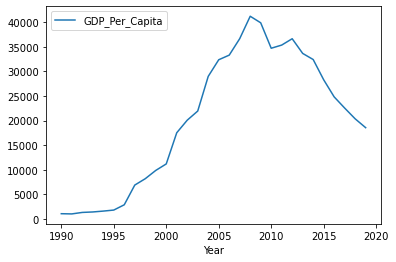

In [20]:
gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita')

<AxesSubplot:xlabel='Year'>

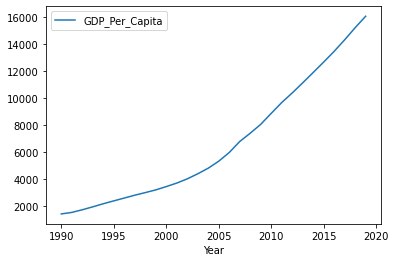

In [21]:
gdp_df[gdp_df['Country'] == 'China'].plot(x='Year', y='GDP_Per_Capita')

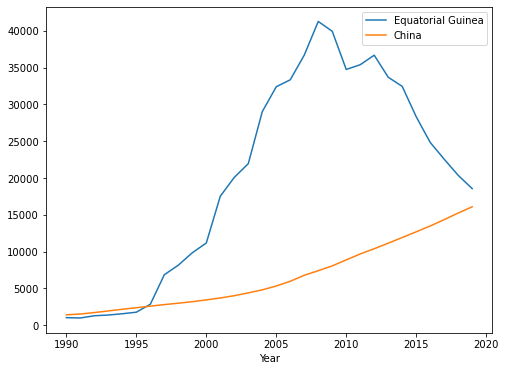

In [22]:
Fig, ax = plt.subplots(figsize = (8, 6))
gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
gdp_df[gdp_df['Country'] == 'China'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
ax.legend(labels=['Equatorial Guinea', 'China'])
plt.show()

Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [23]:
continents = pd.read_csv('../data/continents.csv')

In [24]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [25]:
gdp_df = pd.merge(gdp_df, continents, how='inner', on='Country')

Determine the number of countries per continent. Create a bar chart showing this.

In [26]:
countries_per_continent = gdp_df.groupby('Continent')[['Country']].nunique()
countries_per_continent = countries_per_continent.reset_index()

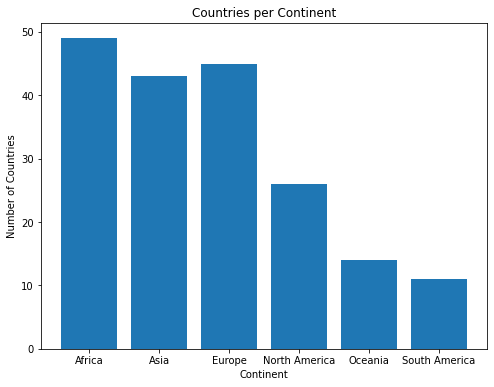

In [27]:
Fig, ax = plt.subplots(figsize = (8, 6))
plt.bar(x = countries_per_continent['Continent'], height = countries_per_continent['Country'])
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Countries per Continent')
plt.show()

Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Continent'>

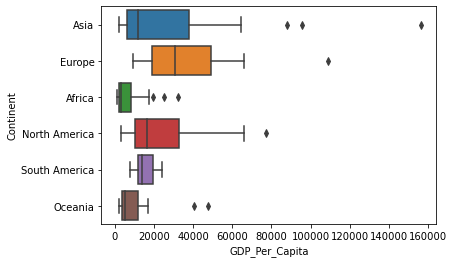

In [28]:
gdp_2014 = pd.merge(gdp_2014, continents, how='inner', on='Country')
sns.boxplot(data = gdp_2014, x = 'GDP_Per_Capita', y = 'Continent')

Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [29]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows=3)

In [30]:
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN,NaN


Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [31]:
life_expectancy = life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2021', 'Unnamed: 66'])

In [32]:
life_expectancy = life_expectancy.melt(id_vars='Country Name')

In [33]:
life_expectancy

,Country Name,variable,value
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16221,Kosovo,2020,71.087805
16222,"Yemen, Rep.",2020,66.181000
16223,South Africa,2020,64.379000
16224,Zambia,2020,64.194000


In [34]:
life_expectancy = life_expectancy.rename(columns = {'Country Name' : 'Country', 'variable' : 'Year', 'value' : 'Life_Expectancy'})

In [35]:
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16221,Kosovo,2020,71.087805
16222,"Yemen, Rep.",2020,66.181000
16223,South Africa,2020,64.379000
16224,Zambia,2020,64.194000


What was the first country with a life expectancy to exceed 80?

In [36]:
life_expectancy.loc[life_expectancy['Life_Expectancy'] >= 80].sort_values('Year')

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
...,...,...,...
16037,France,2020,82.175610
16038,Faroe Islands,2020,83.092683
16041,United Kingdom,2020,80.902439
16053,Guam,2020,80.277000


Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [37]:
life_expectancy['Year'] = life_expectancy['Year'].astype(np.int64)

In [38]:
gdp_le = pd.merge(gdp_df, life_expectancy, how='inner', on=['Country','Year'])

In [39]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019?

In [40]:
gdp_le_2019 = gdp_le.loc[gdp_le['Year'] == 2019]

In [41]:
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
18,Albania,2019,13724.058790,Europe,78.573
48,Algeria,2019,11510.557088,Africa,76.880
78,Angola,2019,6670.332297,Africa,61.147
108,Antigua and Barbuda,2019,21910.184985,North America,77.016
...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474
4998,Vietnam,2019,8041.178551,Asia,75.400
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053
5054,Zambia,2019,3470.448801,Africa,63.886


In [42]:
gdp_le_2019.loc[gdp_le_2019['Life_Expectancy'] >= 80].count()

Country            33
Year               33
GDP_Per_Capita     33
Continent          33
Life_Expectancy    33
dtype: int64

Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [48]:
t3_gdp_2019 = gdp_le_2019.sort_values('GDP_Per_Capita', ascending=False).head(3)
t3_gdp_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2676,"Macao SAR, China",2019,123965.286432,Asia,84.244000
2646,Luxembourg,2019,114304.044210,Europe,82.639024
4051,Singapore,2019,97341.468645,Asia,83.595122


In [49]:
t3_gdp = gdp_le.loc[gdp_le['Country'].isin(list(t3_gdp_2019['Country']))]
t3_gdp

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2646,Luxembourg,2019,114304.044210,Europe,82.639024
2647,Luxembourg,2018,113952.357895,Europe,82.295122
2648,Luxembourg,2017,112666.769445,Europe,82.095122
2649,Luxembourg,2016,113396.753760,Europe,82.685366
2650,Luxembourg,2015,110798.736180,Europe,82.292683
...,...,...,...,...,...
4076,Singapore,1994,46895.053010,Asia,76.197561
4077,Singapore,1993,43555.619036,Asia,76.046341
4078,Singapore,1992,40077.548794,Asia,75.946341
4079,Singapore,1991,38728.403909,Asia,75.646341


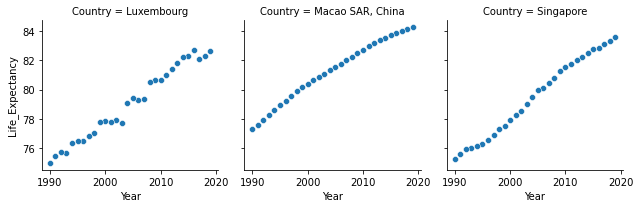

In [52]:
g = sns.FacetGrid(t3_gdp, col='Country')
g.map(sns.scatterplot, 'Year', 'Life_Expectancy')

Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

Positive Correlation between GDP Per Capita and Life Expectancy

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

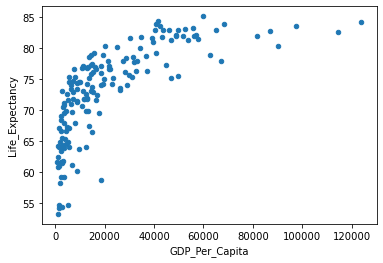

In [53]:
gdp_le_2019.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy')

Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [54]:
gdp_le_2019['GDP_Per_Capita'].corr(gdp_le_2019['Life_Expectancy'])

0.7090182746006474

Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

.848 > .709 so the correlation is stronger between the log of GDP and life expectancy than the correlation between GDP and life expectency.

In [61]:
gdp_le_2019.loc['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

In [62]:
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_gdp
0,Afghanistan,2019.0,2065.036398,Asia,64.833,7.632903
18,Albania,2019.0,13724.058790,Europe,78.573,9.526906
48,Algeria,2019.0,11510.557088,Africa,76.880,9.351020
78,Angola,2019.0,6670.332297,Africa,61.147,8.805425
108,Antigua and Barbuda,2019.0,21910.184985,North America,77.016,9.994707
...,...,...,...,...,...,...
4998,Vietnam,2019.0,8041.178551,Asia,75.400,8.992331
5028,West Bank and Gaza,2019.0,6219.960291,Asia,74.053,8.735519
5054,Zambia,2019.0,3470.448801,Africa,63.886,8.152039
5084,Zimbabwe,2019.0,2835.948532,Africa,61.490,7.950132


In [63]:
gdp_le_2019['log_gdp'].corr(gdp_le_2019['Life_Expectancy'])

0.8484975848006425

<AxesSubplot:xlabel='log_gdp', ylabel='Life_Expectancy'>

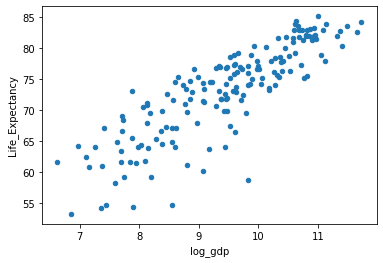

In [64]:
gdp_le_2019.plot(kind='scatter', x='log_gdp', y='Life_Expectancy')